In [1]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import warnings
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from scipy.stats import skew, kurtosis
from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import re

warnings.filterwarnings('ignore')

# Set display options for Pandas DataFrame
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

#### Data Collection
##### Access the 2020 and 2021 data from Microsoft SQL Server
##### Connect to the database using provided credentials

In [2]:
# load environment variables from.env file into dictionary
environment_variables = dotenv_values('.env')

# get the values for the environment variables
server = environment_variables.get("DBS")
login = environment_variables.get("DBU")
password = environment_variables.get("DBP")
database = environment_variables.get("DBN")

# Create a database connection string using pyodbc
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password}"

In [3]:
#Establish a connection to the database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection established successfully",connection_string)
except Exception as e:
    print("Failed to establish connection:", e)

Connection established successfully DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP1_learner;PWD=Hyp0th3s!$T3$t!ng


##### Schema for tables in the database

In [4]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM INFORMATION_SCHEMA.TABLES
        WHERE TABLE_SCHEMA = 'dbo'
        """
# Read data from the SQL query result into a DataFrame using the established database connection
schema_df = pd.read_sql(db_query, connection)

#  Check whether data has been retrieved successfully to confirm successful connection to database
try:
    scheschema_df = pd.read_sql(db_query, connection)
    print("Data retrieved successfully")
    print(schema_df)
except Exception as e:
    print("Failed to retrieve data:", e)

Data retrieved successfully
  TABLE_CATALOG TABLE_SCHEMA               TABLE_NAME  TABLE_TYPE
0         dapDB          dbo  LP1_startup_funding2021  BASE TABLE
1         dapDB          dbo  LP1_startup_funding2020  BASE TABLE


##### LP1_startup_funding2021 Data

In [5]:
#Define the SQL query to show specific tables in the database
query_2021 = """
        SELECT *
        FROM LP1_startup_funding2021        
        """
#Read data from the SQL query result into a dataframe
df_2021 = pd.read_sql(query_2021, connection)

# Display dataframe Info
df_2021.info()
print()

# Display the dataframe
df_2021.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None


##### LP1_startup_funding2020 Data

In [7]:
#Define the SQL query to show specific tables in the database
query_2020 = """
        SELECT *
        FROM LP1_startup_funding2020        
        """
#Read data from the SQL query result into a dataframe
df_2020 = pd.read_sql(query_2020, connection)

# Display dataframe Info
df_2020.info()
print()

# Display the dataframe
df_2020.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None


#### 2019 Data from Onedrive

In [8]:
#CSV file path
file_path = '../Indian_Startup_Ecosystem/Data/startup_funding2019.csv'
#Read data from the file path into a dataframe
df_2019 = pd.read_csv(file_path)

# Display dataframe Info
df_2019.info()
print()

# Display the dataframe
df_2019.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C


#### 2018 Data from Github repository

In [9]:
# url for the csv file
url = "https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/main/startup_funding2018.csv"

# Local file path
local_path = '../Indian_Startup_Ecosystem/startup_funding2018.csv'

# Send a GET request to the URL
try:
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful
    # Save the response content to a local file
    with open(local_path, "wb") as f:
        f.write(response.content)
    print("File saved successfully")
except requests.exceptions.RequestException as e:
    print(f"Failed to download file: {e}")

# Read data from the file path into a dataframe
try:
    df_2018 = pd.read_csv(local_path)
    print("File read successfully")
except pd.errors.ParserError as e:
    print(f"Parser error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# Display dataframe Info
df_2018.info()
print()
# Display the dataframe
df_2018.head(2)

File saved successfully
File read successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB



,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...


#### Brief Data Standardization Considerations

In [10]:
# Print column names of all Dataframes
print("Column names of 2021 dataframe:")
print(df_2021.columns)

print("\nColumn names of 2020 dataframe:")
print(df_2020.columns)

print("\nColumn names of 2019 dataframe:")
print(df_2019.columns)

print("\nColumn names of 2018 dataframe:")
print(df_2018.columns)

Column names of 2021 dataframe:
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

Column names of 2020 dataframe:
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

Column names of 2019 dataframe:
Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

Column names of 2018 dataframe:
Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')


In [11]:
# Create column names mapping dictionary

# Define the column mappings for each dataframe
column_mapping = {
    'Company_Brand': 'company_brand',
    'Founded': 'founded',
    'HeadQuarter': 'head_quarter',
    'Sector': 'sector',
    'What_it_does': 'what_it_does',
    'Founders': 'founders',
    'Investor': 'investor',
    'Amount': 'amount',
    'column10': 'column_10',
    'Stage': 'stage',
    'Company/Brand': 'company_brand',
    'What it does': 'what_it_does',
    'Amount($)': 'amount',
    'Company Name': 'company_brand',
    'Industry': 'sector',
    'Round/Series': 'stage',
    'Location': 'head_quarter',
    'About Company': 'what_it_does'
}

In [12]:
# Rename the columns

df_2021.rename(columns=column_mapping, inplace=True)
df_2020.rename(columns=column_mapping, inplace=True)
df_2019.rename(columns=column_mapping, inplace=True)
df_2018.rename(columns=column_mapping, inplace=True)

# Display renamed column names

print("Column names of 2021 dataframe:")
print(df_2021.columns)

print("\nColumn names of 2020 dataframe:")
print(df_2020.columns) 

print("\nColumn names of 2019 dataframe:")
print(df_2019.columns)

print("\nColumn names of 2018 dataframe:")
print(df_2018.columns)  

Column names of 2021 dataframe:
Index(['company_brand', 'founded', 'head_quarter', 'sector', 'what_it_does',
       'founders', 'investor', 'amount', 'stage'],
      dtype='object')

Column names of 2020 dataframe:
Index(['company_brand', 'founded', 'head_quarter', 'sector', 'what_it_does',
       'founders', 'investor', 'amount', 'stage', 'column_10'],
      dtype='object')

Column names of 2019 dataframe:
Index(['company_brand', 'founded', 'head_quarter', 'sector', 'what_it_does',
       'founders', 'investor', 'amount', 'stage'],
      dtype='object')

Column names of 2018 dataframe:
Index(['company_brand', 'sector', 'stage', 'amount', 'head_quarter',
       'what_it_does'],
      dtype='object')


In [13]:
# add funded year column to each dataframe for ease of comparison

df_2021['funded_year'] = 2021
df_2020['funded_year'] = 2020
df_2019['funded_year'] = 2019
df_2018['funded_year'] = 2018

In [14]:
# Check shape of the dataframes

print("Number of columns in 2021 dataframe:", df_2021.shape[1])
print("Number of columns in 2020 dataframe:", df_2020.shape[1])
print("Number of columns in 2019 dataframe:", df_2019.shape[1])
print("Number of columns in 2018 dataframe:", df_2018.shape[1])

Number of columns in 2021 dataframe: 10
Number of columns in 2020 dataframe: 11
Number of columns in 2019 dataframe: 10
Number of columns in 2018 dataframe: 7


In [15]:
# Based on the dimensions of the dataframes, concatenate dataframes by concatenating them.

df = pd.concat([df_2021, df_2020, df_2019, df_2018], ignore_index=True)
df.head(2)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   head_quarter   2765 non-null   object 
 3   sector         2861 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2622 non-null   object 
 8   stage          1941 non-null   object 
 9   funded_year    2879 non-null   int64  
 10  column_10      2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


In [16]:
# Calculate the number of missing values in the column10 column in the 2020 dataframe
missing_values_count = df["column_10"].isna().sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(df)

# Calculate the percentage of missing values
percentage_missing = (missing_values_count / total_rows) * 100

# Display the percentage of missing values
print(f"Percentage of missing values in column_10: {percentage_missing:.2f}%")

Percentage of missing values in column_10: 99.93%


In [17]:
# Drop column_10 per results above
df.drop(columns=['column_10'], axis=1, inplace=True)

# Display the updated DataFrame
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   head_quarter   2765 non-null   object 
 3   sector         2861 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2622 non-null   object 
 8   stage          1941 non-null   object 
 9   funded_year    2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 225.1+ KB


,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021


### Data Quality Considerations
The datasets are carefully examined to identify common data quality issues such as missing values, outliers, duplicates, inconsistencies, and errors. 

##### Missing and Duplicate Data Quality Considerations

In [18]:
# Determine the proportion of missing values
missing_percentage = (df.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count = df.duplicated(subset=None, keep=False).sum()

# Display duplicated rows if any
duplicated_rows = df[df.duplicated(subset=None, keep=False)]

# Display Results
print("Proportion of missing values in dataset:")
print()
print(missing_percentage)
print("\nNumber of duplicated rows in the dataset:", duplicate_count)
print("\nDuplicated rows in the dataset:")
duplicated_rows

Proportion of missing values in dataset:

company_brand     0.00
founded          26.71
head_quarter      3.96
sector            0.63
what_it_does      0.00
founders         18.93
investor         21.74
amount            8.93
stage            32.58
funded_year       0.00
dtype: float64

Number of duplicated rows in the dataset: 46

Duplicated rows in the dataset:


,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
94,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None,2021
96,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None,2021
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
104,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None,2021
106,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None,2021
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None,2021
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None,2021
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None,2021
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None,2021


##### Unique values Data Quality Considerations

In [19]:
# List all elements in the columns
for i, column in enumerate(df.columns):
    print(f'Column-{i + 1}: {column}: {len(df[column].unique())}\n', df[column].unique())
    print('_'*100)
    print()

Column-1: company_brand: 2214
 ['Unbox Robotics' 'upGrad' 'Lead School' ... 'Mombay' 'Droni Tech'
 'Netmeds']
____________________________________________________________________________________________________

Column-2: founded: 35
 [2019. 2015. 2012. 2021. 2014. 2018. 2016. 2020. 2010. 2017. 1993. 2008.
 2013. 1999. 1989. 2011.   nan 2009. 2002. 1994. 2006. 2000. 2007. 1978.
 2003. 1998. 1991. 1984. 2004. 2005. 1963. 1982. 1995. 1973. 2001.]
____________________________________________________________________________________________________

Column-3: head_quarter: 174
 ['Bangalore' 'Mumbai' 'Gurugram' 'New Delhi' 'Hyderabad' 'Jaipur'
 'Ahmadabad' 'Chennai' None 'Small Towns, Andhra Pradesh' 'Goa'
 'Rajsamand' 'Ranchi' 'Faridabad, Haryana' 'Gujarat' 'Pune' 'Thane'
 'Computer Games' 'Cochin' 'Noida' 'Chandigarh' 'Gurgaon' 'Vadodara'
 'Food & Beverages' 'Pharmaceuticals\t#REF!' 'Gurugram\t#REF!' 'Kolkata'
 'Ahmedabad' 'Mohali' 'Haryana' 'Indore' 'Powai' 'Ghaziabad' 'Nagpur'
 'West Ben

##### Identifying Odd Entries in Each Column

**Column-1: Company_Brand: 2214**

In the context of identifying odd entries in a list of startup names, duplicates are considered odd because they deviate from the expectation that each entry should be unique. In order to identify duplicate startups the following steps are carried out:

1.  Identify key features that represent the core information of a startup
   
2.  Filter duplicates in the dataset based on these key features

In [23]:
# Define key columns to identify duplicates
key_columns = ['company_brand', 'founded', 'head_quarter', 'sector', 'what_it_does', 'founders']

# Check for number of duplicated values within the 'Company_Brand' column
dup1_count = df.duplicated(subset=key_columns, keep=False).sum()

# Identify duplicate entries in the 'Company_Brand' column
dup_c1 = df[df.duplicated(subset=key_columns, keep=False)]

# Extract the list of duplicated company brands
unidup_c1 = dup_c1['company_brand'].unique()

# Display results
print(f"Number of duplicated values in 'company_brand' column: {dup1_count}")
print("\nList of duplicated company brands:")
print(unidup_c1)
dup_c1

Number of duplicated values in 'company_brand' column: 171

List of duplicated company brands:
['DealShare' 'Razorpay' 'Curefoods' 'TartanSense' 'Bewakoof' 'Kirana247'
 'FanPlay' 'NeoDocs' 'IsGoingOnline' 'Camp K12' 'Elda Health' 'Sporjo'
 'Advantage Club' 'SuperGaming' 'Ruptok' 'Trinkerr' 'Zorro'
 'Ultraviolette' 'NephroPlus' 'Unremot' 'FanAnywhere' 'PingoLearn' 'Spry'
 'Enmovil' 'ASQI Advisors' 'Insurance Samadhan' 'Evenflow Brands'
 'MasterChow' 'Fullife Healthcare' 'Codingal' 'BharatPe'
 'Nazara Technologies' 'MPL' 'Unacademy' 'BlackSoil' 'Spinny' 'KreditBee'
 'Cashfree' "BYJU'S" 'True Balance' 'Euler Motors' 'Northern Arc'
 'Cashify' 'Delhivery' 'Credgenics' 'Nykaa' 'Krimanshi' 'FreshtoHome'
 'Genius Teacher' 'Byju’s' 'Zomato' 'Trell' 'HomeLane' 'HungerBox'
 'Magicpin' 'Cuemath' 'Aye Finance' 'Zetwerk' 'LetsTransport' 'BankBazaar'
 'Rentmojo' 'Khatabook' 'Clover' 'Medlife' 'Vedantu' 'Credr' 'Yap' 'Box8'
 'Capital Float' 'Rebel Foods' 'Lido Learning' 'Swiggy' 'Vogo'
 'Digit Insuran

,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
14,DealShare,2018.0,Jaipur,E-commerce,DealShare is a Social Commerce Startup,"Sankar Bora, Sourjyendu Medda, Vineet Rao","Tiger Global Management, InnoVen Capital","$9,000,000",None,2021
20,Razorpay,2014.0,Bangalore,FinTech,Razorpay is a platform that enables businesses...,"Harshil Mathur, Shashank Kumar","Matrix Partners India, GIC","$160,000,000",Series E,2021
94,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None,2021
95,TartanSense,2015.0,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,None,2021
96,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None,2021
...,...,...,...,...,...,...,...,...,...,...
2331,Cuemath,2013.0,Bangalore,Edtech,It helps students to learn math online,Manan Khurma,"Manta Ray Ventures Limited, Google’s Capital G...","$5,500,000",NaN,2019
2338,Credr,2014.0,Mumbai,Automobile,A marketplace to buy and sell used bikes and s...,Mittal,"Omidyar Network, Eight Roads Ventures, GrowthS...","$6,000,000",NaN,2019
2345,Zoomcar,2013.0,Bangalore,Transport & Rentals,A car rental service platform,"Greg Moran, David Back",Zoomcar Inc,"$4,800,000",NaN,2019
2353,TheCollegeFever,NaN,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,250000,Seed,2018


**Column-2: founded: 35**

To identify odd entries in the column that identifies the year in which startup companies in India were founded, we need to focus on identifying entries that deviate from the expected range or format. Specifically, we should consider:

1. Missing or NaN values.
  
2. Years that are unusually old for a startup context.
     -  The range of 1980 to 2024 encompasses a period marked by significant technological innovation, economic dynamism, cultural shifts, and global connectivity, making it reasonable to classify companies founded within this timeframe as startups [United Nations DESA](https://econpapers.repec.org/scripts/redir.pf?u=http%3A%2F%2Fwww.un.org%2Fesa%2Fdesa%2Fpapers%2F2019%2Fwp158_2019.pdf;h=repec:une:wpaper:158), [WEForum](https://www.weforum.org/agenda/2024/01/9-forces-reshaping-the-global-business-landscape/#:~:text=URL%3A%20https%3A%2F%2Fwww.weforum.org%2Fagenda%2F2024%2F01%2F9), [Mercatus Center](https://www.mercatus.org/research/research-papers/technological-innovation-and-economic-growth), [MDPI - Sustainability 2020](https://doi.org/10.3390/su12208323).
  
     -  [Go to Definition of an Indian Startup](#background)



3. Non-numeric values or invalid year formats.

In [25]:
# Define criteria for odd entries in the 'founded' column
def is_odd_year(year):
    
    # Check for missing values
    if pd.isnull(year):
        return True
    
    # Check if the year is not numeric
    if not isinstance(year, (int, float)):
        return True
    
    # Assuming startups would not be founded before 1980 or after 2024
    if year < 1980 or year > 2024:  
        return True
    
    # If the year passes all criteria, it's not considered odd
    return False

# Filter odd entries in the 'founded' column
odde_c2 = df[df['founded'].apply(is_odd_year)]['founded']

# Calculate the number of unique odd entries
oddn_c2 = len(odde_c2.unique())

# Print the number of odd entries and their details
print(f"Number of odd entries in 'founded' column: {oddn_c2}")
print('\nOdd entries:')
for entry in odde_c2:
    print(entry)

Number of odd entries in 'founded' column: 4

Odd entries:
nan
1978.0
1963.0
1978.0
nan
nan
nan
nan
nan
nan
1973.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

**Column-3: head_quarter: 174**

To identify odd entries in the column that lists headquarters or locations in India where startup companies are found, we need to identify entries that do not fit the typical format of Indian city names or locations. Odd entries might include:

1. Missing or NaN values
   
2. Locations outside India.
   
3. Non-geographical entities.
   
4. Entries with noticeable errors or typographical mistakes.

In [26]:
# Identifying odd entries
def is_odd_location(location):
    
    # Check for missing values
    if pd.isnull(location):
        return True
    
    # Check for None values
    if location is None:
        return True
    
    # Strip leading and trailing spaces
    location = location.strip()

    # Check for empty strings
    if len(location) == 0:
        return True
    
    # Define non-geographical keywords
    non_geographical_keywords = ['computer games', 'food & beverages', 'online media', 'information technology & services']

    # Check if the lowercase input string contains any of the lowercase non-geographical keywords
    if any(keyword.lower() in location.lower() for keyword in non_geographical_keywords):
        return True

    # Check for special characters indicating errors or typos
    if '\t#REF!' in location:
        return True
    
    # Check for numeric characters within the location
    if any(non_alpha for non_alpha in location if non_alpha.isdigit()):
        return True
    
    # Check for comma-separated entries
    if ',' in location:
        parts = location.split(',')
        # Check for irregularities in comma-separated entries
        if len(parts) > 2 or any(len(part.strip()) == 0 for part in parts):
            return True
        # Check if the second part contains non-alphabetical characters
        if not parts[1].strip().replace(" ", "").isalpha():
            return True
    
    # Check if the location is not among the predefined list of Indian locations
    return location not in [
        'Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad', 'Jaipur',
        'Ahmadabad', 'Chennai', 'Goa', 'Rajsamand', 'Ranchi', 'Faridabad',
        'Gujarat', 'Pune', 'Thane', 'Cochin', 'Noida', 'Chandigarh', 'Gurgaon',
        'Vadodara', 'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
        'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur', 'Lucknow',
        'Telangana', 'Silvassa', 'Thiruvananthapuram', 'Faridabad', 'Roorkee',
        'Ambernath', 'Panchkula', 'Surat', 'Coimbatore', 'Andheri', 'Mangalore',
        'Telugana', 'Bhubaneswar', 'Kottayam', 'Panaji', 'Satara', 'Orissia',
        'Jodhpur', 'Trivandrum', 'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
        'Kochi', 'The Nilgiris', 'Gandhinagar'
    ]

# Filter odd entries in the 'head_quarter' column
odde_c3 = df[df['head_quarter'].apply(is_odd_location)]['head_quarter']

# Extract unique odd entries
oddn_c3 = odde_c3.unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'head_quarter' column: {len(oddn_c3)}")
print('\nOdd entries:')
for entry in oddn_c3:
    print(entry)


Number of odd entries in 'head_quarter' column: 117

Odd entries:
None
Small Towns, Andhra Pradesh
Faridabad, Haryana
Computer Games
Food & Beverages
Pharmaceuticals	#REF!
Gurugram	#REF!
Beijing
New York
Santra
Mountain View, CA
Online Media	#REF!
London
Information Technology & Services
Belgaum
Tirunelveli, Tamilnadu
Singapore
Kerala
Jaipur, Rajastan
Delhi
Frisco, Texas, United States
California
Dhingsara, Haryana
New York, United States
San Francisco, California, United States
San Francisco, United States
San Ramon, California
Paris, Ile-de-France, France
Plano, Texas, United States
Sydney
San Francisco Bay Area, Silicon Valley, West Coast
Bangaldesh
London, England, United Kingdom
Sydney, New South Wales, Australia
Milano, Lombardia, Italy
Palmwoods, Queensland, Australia
France
San Francisco Bay Area, West Coast, Western US
Trivandrum, Kerala, India
Samastipur, Bihar
Irvine, California, United States
Tumkur, Karnataka
Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom
Shangha

`Comment`

Non-geographical descrepancies will be updated to 'Not filled', and any potential geographical discrepancies will be corrected accordingly. International geographical entries with minimal occurrences will be removed if their exclusion does not compromise data integrity.

**Column-4: sector: 875**

To identify odd entries in the given list of sectors of startups in India, we need to consider entries that do not align with typical startup sectors or contain errors. Odd entries might include:

1. Missing or NaN values

2. Location entries
   
3. Sectors with more than 5 words
   
4. Typos or mispellings
   
5. Uncommon abbreviations
   
6. Inconsistent formatting
   
7. Non-industry terms and unusaul sectors

In [29]:
# Define a funtion to identifyodd entries in the list of statup sectors
def is_odd_sector(sector):
    
    # Check for missing values
    if pd.isnull(sector):
        return True    

    # Strip leading and trailing spaces
    sector = sector.strip()

    # Check for empty strings
    if len(sector) == 0:
        return True
    
    # Check for location entries
    if ',' in sector:
        return True
    
    # Check for sectors with more than 5 words
    if len(sector.split()) > 5:
        return True
    
    # Check for typos or misspellings
    if 'Helathcare' in sector or 'equiptment' in sector:
        return True
    
    # Check for numeric values within the sector
    if re.search(r'\d', sector):
        return True
    
    # Check for inconsistent formatting
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in sector for char in special_characters):
        return True
    
    # Check for Non-industry terms and unusual sectors
    non_industry_terms = ['hauz khas', 'music', 'manchester', 'sochcast', 'matrimony', 'company-as-a-service', 'startup', 'news','dating', 'PaaS', 'Music' 'Hauz Khas' ]
    if any(term.lower() in sector.lower() for term in non_industry_terms):
        return True
    
    return False

# Filter odd entries in the 'Sector' column
odde_c4 = df['sector'].apply(is_odd_sector)
oddn_c4 = df[odde_c4]['sector'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'sector' column: {len(oddn_c4)}")
print('\nOdd entries:')
for entry in oddn_c4:
    print(entry)

Number of odd entries in 'sector' column: 489

Odd entries:
AI startup
B2B E-commerce
Tech Startup
E-commerce
B2B service
Helathcare
IT startup
Food & Beverages
Dating
Milk startup
SaaS startup
Apparel & Fashion
Logistics & Supply Chain
Wine & Spirits
Mechanical & Industrial Engineering
Tech startup
Information Technology & Services
B2B marketplace
E-learning
Venture Capital & Private Equity
Health, Wellness & Fitness
Software Startup
Computer & Network Security
Hospital & Health Care
Music
Hauz Khas
Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.
MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.
B2B Ecommerce
Cannabis startup
B2B Marketplace
B2B Manufacturing
TaaS startup
EV startup
Blockchain startup
Manufacturing startup
Vehicle repair startup
Pollution control equiptment
Fashion & Lifestyle
D2C
Marketing & Advertising
D2C B

Comments`

The 'Sector' column contains numerous unique values, many of which are worded differently despite having the same meaning. There are two approaches to address this column:

**1. Maintaining Current Granularity:** This approach involves standardizing the terminology by assigning a single term to synonymous entries and replacing odd or inconsistent entries with either a suitable existing term or 'Not filled'.
   
**2. Defining Descriptive and Collective Bins:** This method involves categorizing the sectors into broader, descriptive bins. These bins can be defined within the existing 'Sector' column or by creating a new column named 'Sector_Category'. The proposed bins include, but are not limited to, the following categories:
   
   - Technology & Innovation

   - Health & Wellness

   - Finance & Commerce

   - Consumer Goods & Services

   - Media & Marketing

   - Transportation & Mobility

   - Industrial & Manufacturing

   - Legal & Professional Services

   - Art & Design

   - Education & Training

   - Environmental & Renewable Energy

   - Real Estate & Construction

   - Food & Beverage Industry
      
   - Social & Community Services

**Column-5: what_it_does: 2691**

To identify odd entries in the given list of what startups do in India, we need to consider entries that might include:

1. Missing or NaN values
   
2. Entries containing unusual special characters and a word count less than 5
   
3. Entries that include a string pattern like $xxxxxxxxxxxx

In [30]:
# Define a function to identify odd entries in the list of startup activities
def is_odd_activity(activity):
    
    # Check for missing values
    if pd.isnull(activity):
        return True    

    # Strip leading and trailing spaces
    activity = activity.strip()

    # Check for empty strings
    if len(activity) == 0:
        return True  
     
    # Check for strings like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', activity):
        return True
    
    # Check for entries containing unusual special characters and a word count less than 5
    # List of special characters
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in activity for char in special_characters) and len(activity.split()) < 5:
        return True
    
    return False

# Filter odd entries in the 'What_it_does' column
odde_c5 = df['what_it_does'].apply(is_odd_activity)
oddn_c5 = df[odde_c5]['what_it_does'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'what_it_does' column: {len(oddn_c5)}")
print('\nOdd entries:')
for entry in oddn_c5:
    print(entry)


Number of odd entries in 'what_it_does' column: 60

Odd entries:
Tata Digital-backed Curefit
Vikash Mishra, Mragank Jain
Plant-based nutraceutical firm
India's First Icepops Brand
Small businesses-focused non-banking lender
Video integrated social-gaming platform
24*7 convenience store
Video-based social commerce startup
100% Natural Dog Treats.
Sustainability for the future.
World's first cross-border Neobank
Just-in-time Sales Enablement Platform
A gig/on-demand staffing company.
Escrow-as-a-service platform
Pre-seed/Seed focussed VC investor
SaaS-based equity management platform
Crowdfunding, Charity, E-commerce
A multi-game platform
World's largest video publisher
Agri-inputs ecommerce player
User-generated content platform
Subscription-based Water purifier startup
On-demand beauty services provider
India-based hyperlocal delivery startup
Operates vernacular-language based education
Pan-India Credit providing platform
Platform for vernacular test-preparation
Source-to-Pay Software


**Column-6: founders: 1982**

To identify odd entries in the given list of founders of startups in India, we need to consider entries that might include:

1. Missing or NaN values
   
2. Entries containing unusual special characters and a word count less than 2
   
3. Entries that include a string pattern like $xxxxxxxxxxxx

In [31]:
# Define a function to identify odd entries in the list of startup founders.

def is_odd_founder(founder):
    
    # Check for missing values
    if pd.isnull(founder):
        return True
    # Strip leading and trailing spaces
    founder = founder.strip()

    # Check for empty strings
    if len(founder) == 0:
        return True  
     
    # Check for strings like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', founder):
        return True
    

    # Check for entries containing unusual special characters and a word count less than 2
    # List of special characters
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in founder for char in special_characters) and len(founder.split()) < 2:
        return True
    
    return False

# Filter odd entries in the 'Founders' column
odde_c6 = df['founders'].apply(is_odd_founder)
oddn_c6 = df[odde_c6]['founders'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'founders' column: {len(oddn_c6)}")
print('\nOdd entries:')
for entry in oddn_c6:
    print(entry)

Number of odd entries in 'founders' column: 2

Odd entries:
None
nan


**Column-7: investor: 1779**

To identify odd entries in the given list of investors of startups in India, we need to consider entries that might include:

1. Missing or NaN values
   
2. Entries containing unusual special characters and a word count less than 2
   
3. Entries that include a string pattern like $xxxxxxxxxxxx

In [32]:
# Define a function to identify odd entries in the list of investors for startups.

def is_odd_investor(investor):
    
    # Check for missing values
    if pd.isnull(investor):
        return True
    # Strip leading and trailing spaces
    investor = investor.strip()

    # Check for empty strings
    if len(investor) == 0:
        return True  
    
    # Check for entries containing unusual special characters and a word count less than 2
    special_characters = [
        '&', '@', '#', '$', '%', '^', '*', '!', '?', '(', ')', '-', '_', '=', '+',
        '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '/',
        '~', '`'
    ]
    if any(char in investor for char in special_characters) and len(investor.split()) < 3:
        return True
    
    # Check for entries that include a string pattern like $xxxxxxxxxxxx
    if re.match(r'^\$[0-9]{1,}$', investor):
        return True
    
    return False

# Filter odd entries in the 'investor' column
odde_c7 = df['investor'].apply(is_odd_investor)
oddn_c7 = df[odde_c7]['investor'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'investor' column: {len(oddn_c7)}")
print('\nOdd entries:')
for entry in oddn_c7:
    print(entry)

Number of odd entries in 'investor' column: 60

Odd entries:
CIIE.CO, KIIT-TBI
None
http://100x.vc/
BEENEXT, Orios
9Unicorns, ZNL
$22000000
$5000000
Y-Combinator
Sauce.vc
CIIE.CO
ah! Ventures
Waterbridge, Lumikai
Auxano, Falcon5
GIC, Infoedge
Aqua-Spark
$1000000
Fidelity, BlackRock
velocity.in
Fidelity, GIC
HNIs, Angels
N+1 Capital
Krafton, Lumikai
PayU, Google
Brex, Y-Combinator
NEVF, AccelNest
$Undisclosed
Lightspeed, Sequioa
1000000	#REF!
ICICI Bank.
BlackSoil, Caspian
Flipkart, Walmart
Sequoia Capital.
9Unicorns, Anicut
GoodWorker.
Endiya Partners.
>Vikram Sud
AngelList, Investec
MOX, SOSV
SOSV, Artesian
Startup Basket.
NABVENTURES, Omnivore
Triodos, Caspian
BlackSoil, BEENEXT
Homage Ventures.
Prospect Partners.
Omnivore, Zeroth.AI
Mumbai Angels.
responsAbility, Accel
Madison, Anicut
Chiratae Ventures.
Nestavera Ventures.
Ah! Ventures
Atraxn Partners.
Prosus N.V
Unitus Ventures.
SOSV, Chinaccelerator
Goldman Sachs.
Blume Ventures.
Walmart, Flipkart
nan


**Column-8: amount: 776**

To identify the odd entries in the list of funding amounts to startups in India, we need to consider entries that meet the criteria described below:

1. Format inconsistency

2. Non-numeric values

3. Unusual symbols or standalone special characters


In [35]:
# Define a function to identify odd entries in the list of funding amounts given to startups

def odd_amount(amount):
    
    # Check for missing values
    if pd.isnull(amount):
        return True
    # Strip leading and trailing spaces
    amount = str(amount).strip()

    # Check for empty strings
    if len(amount) == 0:
        return True
    
    # Check if the amount contains only text and/or special characters
    if re.match(r'^[^\d,]+$', str(amount)):
        return True
    
    return False

# Apply the odd_amount function to each element in the 'amount' column of df2021
odde_c8 = df['amount'].apply(odd_amount)

# Filter the DataFrame to get only the rows where 'amount' column has odd entries
oddn_c8 = df[odde_c8]['amount'].unique()

# Print the number of odd entries and their details
print(f"Number of odd entries in 'amount' column: {len(oddn_c8)}")
print('\nOdd entries:')
for entry in oddn_c8:
    print(entry)

Number of odd entries in 'amount' column: 12

Odd entries:
Undisclosed
None
$Undisclosed
Upsparks
Series C
Seed
$undisclosed
ah! Ventures
Pre-series A
$
nan
—


**Column-9: stage: 77**

To identify the odd entries in the 'Stage' column, we need to determine which entries deviate from typical startup funding stages. Odd entries might include:

1. Missing or NaN Values
   
2. Non standard startup funding stages
   
3. Special characters or symbols
   
4. Unsual naming conventions

In [36]:
def odd_stage(stages):
    
    odd_entries = []
    valid_stages = ['Pre-series A', 'Series A', 'Seed', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I', 'Series F1', 'Series F2', 'Series A+', 'Series B3', 'Early seed', 'Pre-seed', 'Pre-series', 'Pre-series A1', 'Pre-series B', 'Series D1', 'Series A2', 'Seed+',
                    'Private Equity', 'Post-IPO Debt', 'Post-IPO Equity', 'Grant', 'Corporate Round', 'Funding Round', 'Non-equity Assistance', 'Angel', 'Pre-Seed', 'Debt Financing']
    for stage in stages:
        # Check for missing values
        if pd.isnull(stage):
            odd_entries.append(stage)
        elif stage not in valid_stages:
            odd_entries.append(stage)
    return odd_entries

# Identify odd entries in 'Stage' column of df2021
odde_c9 = odd_stage(df['stage'])

# Get unique odd entries
oddn_c9 = set(odde_c9)

# Print the number of odd entries and their details
print(f"Number of odd entries in 'stage' column: {len(oddn_c9)}")
print('\nOdd entries:')
for entry in oddn_c9:
    print(entry)


Number of odd entries in 'stage' column: 44

Odd entries:
Series E2
https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593
Secondary Market
Pre-Series B
Series B+
Angel Round
Seed Round & Series A
Bridge
Pre seed round
Seed funding
Bridge Round
None
Undisclosed
Pre-series C
Seies A
$300000
Edge
Pre series C
Pre series A1
Seed Investment
Seed Funding
Mid series
Fresh funding
Pre seed Round
Post series A
$1200000
$6000000
Seed Round
Series C, D
Debt
Series B2
Pre-seed Round
Series A-1
Pre- series A
PE
Pre series A
Venture - Series Unknown
Seed A
Pre Series A
nan
Seed fund
$1000000
Pre series B
Seed round


[Back to Top](#Table-of-Contents)

## Step 3: Data Preparation

`Data Cleaning`

Effective data cleaning is crucial to ensure the integrity and usability of the dataset for analysis. The steps involved in data cleaning will include:

**A. Remove Duplicates:**

Identify and remove duplicate records to ensure that each entry is unique and not counted multiple times. This involves checking for repeated start-up names, funding amounts, and investor details.

**B. Eliminate Irrelevant Data:**

Remove any data that is not relevant to the analysis. This could include fields that do not contribute to the understanding of funding trends or extraneous information not related to start-up funding.

**C. Handle Missing Values:**

- Imputation: For fields with missing data, use appropriate imputation methods to fill in the gaps. This could involve using mean, median, or mode for numerical values, or the most frequent category for categorical variables.

- Removal: If the amount of missing data is substantial and imputation is not feasible, records are removed entirely. However, this is done if deletion does not significantly impact the overall dataset integrity.
  
**D. Standardise Formats:**

- Dates: Ensure all date fields follow a consistent format (e.g., YYYY-MM-DD) to facilitate accurate time-based analysis.
  
- Funding Amounts: Standardize funding amounts to a common currency and format, ensuring consistency in how values are presented and analysed.

- Categorical Variables: Ensure uniform labelling for categorical variables such as sectors, funding stages, and locations to avoid discrepancies (e.g., "Health Care" vs. "Healthcare").

`Data Transformation`

Data transformation involves modifying the data to better suit the analytical methods to be applied. The steps include:

**A. Aggregate Funding Data:**

- By Year: Summarize funding data on an annual basis to identify year-over-year trends in funding amounts and number of funding rounds.
  
- By Sector: Aggregate funding by sector to determine which industries are receiving the most investment.
  
- By Funding Stage: Summarize data by funding stage (e.g., seed, series A, series B) to understand the distribution of investments across different start-up maturity levels.
  
**B. Normalize Funding Amounts:**

Adjust funding amounts for inflation or currency changes over the years to ensure that comparisons are made on a like-for-like basis. This is important for accurately assessing trends and changes in funding amounts over time.

`Data Integration`

Data integration involves combining multiple datasets into a single, comprehensive dataset for analysis. This includes:

**A. Combine Datasets from Different Years:**

Merge datasets from 2018 to 2021 into a unified dataset. Ensure that the structure and format of data from each year are consistent to facilitate seamless integration. Address any discrepancies or differences in data schema across years to create a cohesive dataset.

**B. Ensure Consistency:**

Verify that all integrated data follows the standardized formats and labelling conventions established during the data cleaning process. Cross-reference and validate combined data to ensure no information is lost or misrepresented during the integration process.

### Data Cleaning

##### Remove Duplicates

**Based on all Features**

In [37]:
# Create a copy of df to avoid modifying the original DataFrame
cl_df = df.copy()

# Remove duplicate rows from cl_df, and reset the index of the resulting DataFrame
cl_df.drop_duplicates(inplace=True, ignore_index=True)

# Display info of Data Frame
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2088 non-null   float64
 2   head_quarter   2742 non-null   object 
 3   sector         2838 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2232 non-null   object 
 7   amount         2600 non-null   object 
 8   stage          1927 non-null   object 
 9   funded_year    2856 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 223.3+ KB


**Based on First Eight Features**

In [38]:
# Filter rows with duplicated values in all columns except the last one
cl_df[cl_df.duplicated(subset=cl_df.columns[0:8], keep=False)]

,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
95,TartanSense,2015.0,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,None,2021
97,Kirana247,2018.0,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,$1000000,None,2021
99,NeoDocs,2020.0,Mumbai,Healthtech,Neodocs is a part of India's prominent Social ...,"Nikunj Malpani, Anurag Meena, Pratik Lodha","Y Combinator, 9Unicorns, Titan Capital",$Undisclosed,None,2021
100,IsGoingOnline,2015.0,Cochin,Retail,Kochi-based digital catalogue and marketplace ...,Eobin Alex,"Unicorn India Ventures, SEA Fund, Devdatt Shah",$200000,None,2021
101,Camp K12,2010.0,Gurugram,EdTech,Camp K12 is a global online school for 21st ce...,Anshul Bhagi,"Matrix Partners India, Elevation Capital",$12000000,None,2021
102,Elda Health,2020.0,Bangalore,Healthcare,Elda Health is a digital wellness platform tha...,"Swathi Kulkarni, Sindhuri Ananth, Shubham Sharma","Avaana Capital, Orios Ventures",$1500000,None,2021
103,Sporjo,2020.0,Mumbai,SportsTech,A one stop destination to build a successful c...,G Srinivvasan,Punit Balan,$2000000,None,2021
105,SuperGaming,2017.0,Pune,Gaming,"At SuperGaming, building India's best gaming c...","Roby John, Sanket Nadhani, Navneet Waraich","Skycatcher, AET Fund, BAce Capital, Dream Incu...",$5500000,None,2021
107,TartanSense,2015.0,Bangalore,Information Technology,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",$5000000,Series A,2021
108,Kirana247,2018.0,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",None,$1000000,Pre-series A,2021


In [39]:
# Remove duplicate rows based on the first 8 columns, keeping the last occurrence
cl_df.drop_duplicates(subset=cl_df.columns[0:8], inplace=True, ignore_index=True, keep='last')

# Display info of Data Frame
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2848 non-null   object 
 1   founded        2080 non-null   float64
 2   head_quarter   2734 non-null   object 
 3   sector         2830 non-null   object 
 4   what_it_does   2848 non-null   object 
 5   founders       2304 non-null   object 
 6   investor       2225 non-null   object 
 7   amount         2592 non-null   object 
 8   stage          1927 non-null   object 
 9   funded_year    2848 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 222.6+ KB


**Based on First Seven Features**

In [40]:
# Filter rows with duplicated values in all columns except the last two
cl_df[cl_df.duplicated(subset=cl_df.columns[0:7], keep=False)]

,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year
345,MPL,2018.0,Bangalore,Gaming,Mobile Premier League is a skill-based eSports...,"Sai Srinivas Kiran G, Shubham Malhotra","Pegasus Tech Ventures, Base Partners","$95,000,000",None,2021
367,MPL,2018.0,Bangalore,Gaming,Mobile Premier League is a skill-based eSports...,"Sai Srinivas Kiran G, Shubham Malhotra","Pegasus Tech Ventures, Base Partners","$5,000,000",None,2021
374,BharatPe,2018.0,New Delhi,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani","InnoVen Capital, Steadview Capital","$6,000,000",Debt,2021
380,BharatPe,2018.0,New Delhi,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani","InnoVen Capital, Steadview Capital","$10,000,000",Debt,2021
611,BYJU'S,2011.0,Bangalore,EdTech,BYJU'S is an educational technology company th...,"Byju Raveendran, Divya Gokulnath","Tiga Investments, Baron Capital",$350000000,None,2021
766,Cashify,2009.0,Gurugram,E-commerce,Cashify.in is an e-commerce platform for resel...,"Amit Sethi, Mandeep Manocha, Nakul Kumar","Bessemer Venture Partners, CDH Investments","$15,000,000",None,2021
835,BYJU'S,2011.0,Bangalore,EdTech,BYJU'S is an educational technology company th...,"Byju Raveendran, Divya Gokulnath","Tiga Investments, Baron Capital","$150,000,000",None,2021
1376,FreshtoHome,2015.0,Bangalore,E-commerce,Freshtohome is an e-commerce platform for fres...,Shan Kadavil,"Ascent Capital, Iron Pillar",121000000.0,Series C,2020
1391,FreshtoHome,2015.0,Bangalore,E-commerce,Freshtohome is an e-commerce platform for fres...,Shan Kadavil,"Ascent Capital, Iron Pillar",16000000.0,None,2020
1528,Zomato,2008.0,Haryana,Food devlivery,Get online food delivery from restaurants near...,"Deepinder Goyal, Pankaj Chaddah","MacRitchie Investments, Baillie Gifford",62000000.0,None,2020


`Comments`

1. MPL (Mobile Premier League) raised $95M and $5M from Pegasus Tech Ventures and Base Partners. The $95M is likely a later-stage round for scaling, while the $5M is probably a seed or early-stage round.

2. BharatPe raised $6M and $10M from InnoVen Capital and Steadview Capital as debt investments. The $6M is likely an early-stage debt round for initial growth, and the $10M a subsequent stage for further scaling.

3. BYJU'S raised $350M and $150M from Tiga Investments and Baron Capital. Both amounts suggest later-stage rounds for business expansion and growth.

    Without further details regarding the specific funding rounds, these inferences are derived solely from the funding amounts. Therefore, before considering the removal of these rows, it is advisable to determine if any of the amounts are outliers. Dropping such outliers should not adversely impact the integrity of the dataset.

***Converting the 'Amount' column to float***

In [42]:
# Define a function to convert string to float or NaN if not convertible
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return np.nan

# Apply the function to each element in the "Amount" column
cl_df['amount'] = cl_df['amount'].apply(lambda x: convert_to_float(re.sub(r'[^\d.]', '', str(x))))

# Check the data type of the "Amount" column
cl_df['amount'].dtype


dtype('float64')

***Univariate Analysis of the 'Amount' Column***

Descriptive Statistics for 'amount' column:
count    2.286000e+03
mean     1.589379e+08
std      3.506936e+09
min      7.500000e+03
25%      1.000000e+06
50%      4.000000e+06
75%      1.900000e+07
max      1.500000e+11
Name: amount, dtype: float64

Skewness for 'amount' column: nan
Kurtosis for 'amount' column: nan


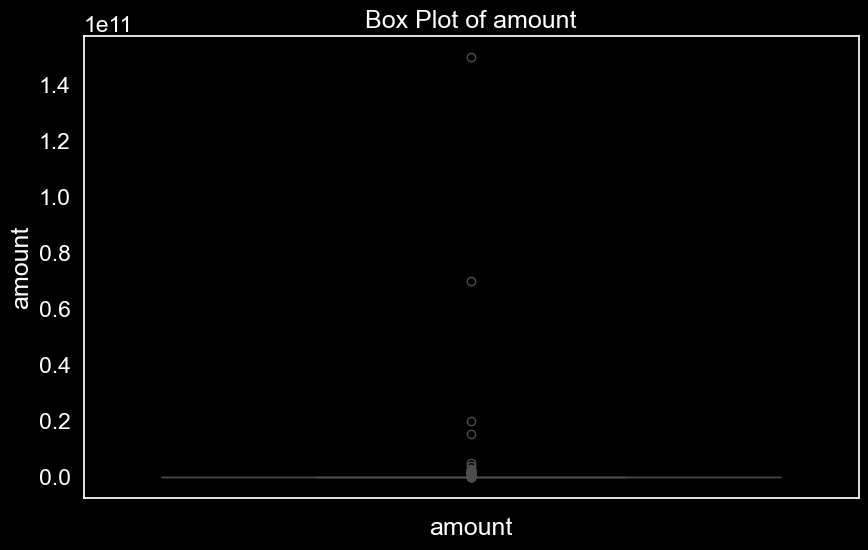

In [43]:
# Descriptive Statistics
print("Descriptive Statistics for 'amount' column:")
print(cl_df['amount'].describe())

# Skewness and Kurtosis
amount_skewness = skew(cl_df['amount'])
amount_kurtosis = kurtosis(cl_df['amount'])

print(f"\nSkewness for 'amount' column: {amount_skewness}")
print(f"Kurtosis for 'amount' column: {amount_kurtosis}")

# set theme
sns.set_theme(style="dark", palette="dark", font="sans-serif", font_scale=1.5)
plt.style.use("dark_background")
custom_palette = ["cyan", "magenta", "yellow"]

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=cl_df['amount'], palette=custom_palette)
plt.title('Box Plot of amount')
plt.xlabel('amount')
plt.show()

***Drop all duplicates that have none in 'Stage' column***

In [44]:
# Separate rows with 'Debt' in the 'Stage' column
debt_rows = cl_df[cl_df['stage'] == 'Debt']
non_debt_rows = cl_df[cl_df['stage'] != 'Debt']

# Remove all duplicate rows based on the first 7 columns in non-debt rows, keeping the last occurrence
non_debt_rows.drop_duplicates(subset=non_debt_rows.columns[0:7], inplace=True, ignore_index=True, keep=False)

# Concatenate the debt and non-debt rows back together
cl_df = pd.concat([non_debt_rows,debt_rows], ignore_index=True)

# Display info of Data Frame
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2832 non-null   object 
 1   founded        2064 non-null   float64
 2   head_quarter   2718 non-null   object 
 3   sector         2814 non-null   object 
 4   what_it_does   2832 non-null   object 
 5   founders       2288 non-null   object 
 6   investor       2209 non-null   object 
 7   amount         2270 non-null   float64
 8   stage          1920 non-null   object 
 9   funded_year    2832 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 221.4+ KB


**Based on Key Columns**

In [45]:
# Define the key columns to check for duplicates
key_columns = ['what_it_does', 'head_quarter', 'sector', 'company_brand']

# Check for the number of duplicated values within the key columns
dupl_count = cl_df.duplicated(subset=key_columns, keep=False).sum()

# Identify duplicate entries in the key columns
dup_cl = cl_df[cl_df.duplicated(subset=key_columns, keep=False)]

# Extract the list of duplicated company brands
unidup_cl = dup_cl['company_brand'].unique()

# Display results
print(f"Number of duplicated values in 'company_brand' column: {dupl_count}")
print("\nList of duplicated company brands:")
print(unidup_cl)

Number of duplicated values in 'company_brand' column: 123

List of duplicated company brands:
['DealShare' 'Razorpay' 'TagZ Foods' 'Codingal' 'BharatPe' 'Siply'
 'Nazara Technologies' 'Unacademy' 'BlackSoil' 'Slice' 'Spinny' 'Licious'
 'KreditBee' 'Cashfree' 'CityMall' 'Euler Motors' 'Cashify' 'GoKwik'
 'Delhivery' 'Credgenics' 'True Balance' 'Genius Teacher' 'Trell' 'Mitron'
 'LendingKart' 'HungerBox' 'Vedantu' 'Magicpin' 'Cuemath' 'Aye Finance'
 'Zetwerk' 'LetsTransport' 'Waycool' 'BankBazaar' 'Rentmojo' 'Dunzo'
 'Khatabook' 'Phable' 'Clover' 'DailyHunt' 'Medlife' 'Credr' 'Yap' 'Box8'
 'Capital Float' 'Rebel Foods' 'Lido Learning' 'Swiggy' 'Furlenco'
 'Mera Cashier' 'Digit Insurance' 'Shuttl' 'Byju' 'Zoomcar' 'Purplle'
 'Northern Arc']


***Duplicated columns only in list of duplicated company brands before deletion of duplicates***

In [46]:
# Create a set of the list of duplicated company brands based on key columns before deletion of duplicates
unidup_c1_values = set(unidup_c1)

# Create a set of the list of duplicated company brands based on key columns after deletion of duplicates
unidup_cl_values = set(unidup_cl)

# Find the values that only appear in the list of duplicated company brands before deletion of duplicates
values_only_in_unidup_c1 = unidup_c1_values - unidup_cl_values

# Display Results
print("Values only in list of duplicated company brands before deletion of duplicates:")
print(values_only_in_unidup_c1)

# Filter rows where 'Company_Brand' is 'Values only in list of duplicated company brands before deletion of duplicates'
values_only_in_unidup_c1_21_rows = cl_df[cl_df['company_brand'].isin(values_only_in_unidup_c1)]

# Filter 'values_only_in_unidup_c1_21_rows' based on the key columns
values_only_in_unidup_c1_21_rows[values_only_in_unidup_c1_21_rows.duplicated(subset=key_columns, keep=False)]

Values only in list of duplicated company brands before deletion of duplicates:
{"BYJU'S", 'Enmovil', 'Vogo', 'IsGoingOnline', 'MPL', 'Sporjo', 'FanAnywhere', 'Unremot', 'Curefoods', 'TartanSense', 'Zorro', 'Trinkerr', 'Evenflow Brands', 'FreshtoHome', 'NephroPlus', 'Kirana247', 'Fullife Healthcare', 'Ultraviolette', 'Bewakoof', 'SuperGaming', 'Nykaa', 'ASQI Advisors', 'Bounce', 'PingoLearn', 'Spry', 'Insurance Samadhan', 'Advantage Club', 'Elda Health', 'MasterChow', 'Ruptok', 'Zomato', 'Krimanshi', 'Byju’s', 'Camp K12', 'TheCollegeFever', 'NeoDocs', 'FanPlay', 'HomeLane'}


,company_brand,founded,head_quarter,sector,what_it_does,founders,investor,amount,stage,funded_year


##### Handling Odd Entries and Irrelevant Data

**Drop companies founded before 1980 and after 2021**

In [47]:
# Drop rows where the 'founded' column has values less than 1980 or greater than 2021
cl_df = cl_df[(cl_df['founded'] >= 1980) & (cl_df['founded'] <= 2021)].reset_index(drop=True)

# Display info of Data Frame
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2060 non-null   object 
 1   founded        2060 non-null   float64
 2   head_quarter   1987 non-null   object 
 3   sector         2051 non-null   object 
 4   what_it_does   2060 non-null   object 
 5   founders       2051 non-null   object 
 6   investor       1965 non-null   object 
 7   amount         1718 non-null   float64
 8   stage          1269 non-null   object 
 9   funded_year    2060 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 161.1+ KB


**Replacing and dropping odd locations**

In [50]:
# Split the 'Location' column to extract cities
df[['city', 'state', 'country']] = df['head_quarter'].str.split(', ', expand=True)

# Extract only the cities
cities = df['city']


In [51]:
# Display the cities
print(cities.tolist())

['Bangalore', 'Mumbai', 'Mumbai', 'Mumbai', 'Gurugram', 'New Delhi', 'Bangalore', 'Mumbai', 'Bangalore', 'Mumbai', 'Mumbai', 'New Delhi', 'Bangalore', 'Hyderabad', 'Jaipur', 'Bangalore', 'New Delhi', 'Bangalore', 'New Delhi', 'Bangalore', 'Bangalore', 'Bangalore', 'New Delhi', 'Ahmadabad', 'Chennai', 'Bangalore', 'New Delhi', 'Gurugram', 'New Delhi', None, 'Bangalore', 'Mumbai', 'Small Towns', 'Bangalore', 'New Delhi', 'Gurugram', 'Goa', 'Rajsamand', 'New Delhi', 'Mumbai', 'Bangalore', 'Ranchi', 'Ahmadabad', 'Faridabad', 'Bangalore', 'Gurugram', 'Bangalore', 'Gurugram', 'Mumbai', 'New Delhi', 'Gurugram', 'Gurugram', 'New Delhi', 'Bangalore', 'Bangalore', 'Bangalore', 'Bangalore', 'Gujarat', 'Bangalore', 'Bangalore', 'Mumbai', 'Mumbai', 'Mumbai', 'Gurugram', 'New Delhi', 'Bangalore', 'Bangalore', 'Pune', 'Gurugram', 'Bangalore', 'Bangalore', 'Gurugram', 'Gurugram', 'Mumbai', 'Thane', 'Gurugram', 'Bangalore', 'Hyderabad', 'Bangalore', 'Bangalore', 'Bangalore', 'Bangalore', 'Gurugram', 'P

In [59]:
#Define a function that identifies odd locations in the dataset and return only the city alone

def replace_odd_location(location):
    # Check if the location is None or not a string
    if location is None or not isinstance(location, str):
        return 'Not filled'
    
    # Check if the location contains '#REF!'
    if '#REF!' in location:
        return 'Not filled'
    
    # Specific replacements
    if location == 'Faridabad, Haryana':
        return 'Faridabad'
    if location == 'Banglore':
        return 'Bangalore'
    if location == 'Bangalore, Karnataka, India':
        return 'Bangalore'
    if location == 'Mumbai, Maharashtra, India':
        return 'Mumbai'
    if location == 'Gurgaon, Haryana, India':
        return 'Gurgaon'
    if location == 'New Delhi, Delhi, India':
        return 'New Delhi'
    if location == 'Noida, Uttar Pradesh, India':
        return 'Noida'
    if location == 'Hyderabad, Andhra Pradesh, India':
        return 'Hyderabad'
    if location == 'Chennai, Tamil Nadu, India':
        return 'Chennai'
    if location == 'Pune, Maharashtra, India':
        return 'Pune'
    if location == 'Chandigarh, Chandigarh, India':
        return 'Chandigarh'
    if location == 'Bengaluru, Karnataka, India':
        return 'Bangalore'
    if location == 'Kalkaji, Delhi, India':
        return 'Kalkaji'
    if location == 'Delhi, Delhi, India':
        return 'Delhi'
    if location == 'Hubli, Karnataka, India':
        return 'Hubli'
    if location == 'Mohali, Punjab, India':
        return 'Mohali'
    if location == 'Kolkata, West Bengal, India':
        return 'Kolkata'
    if location == 'Kanpur, Uttar Pradesh, India':
        return 'Kanpur'
    if location == 'Jodhpur, Rajasthan, India':
        return 'Jodhpur'
    if location == 'Ahmedabad, Gujarat, India':
        return 'Ahmedabad'
    if location == 'Azadpur, Delhi, India':
        return 'Azadpur'
    if location == 'Haryana, Haryana, India':
        return 'Haryana'
    if location == 'Cochin, Kerala, India':
        return 'Cochin'
    if location == 'Jaipur, Rajasthan, India':
        return 'Jaipur'
    if location == 'Kota, Rajasthan, India':
        return 'Kota'
    if location == 'Anand, Gujarat, India':
        return 'Anand'
    if location == 'Bangalore City, Karnataka, India':
        return 'Bangalore'
    if location == 'Belgaum, Karnataka, India':
        return 'Belgaum'
    if location == 'Thane, Maharashtra, India':
        return 'Thane'
    if location == 'Margão, Goa, India':
        return 'Margao'
    if location == 'Indore, Madhya Pradesh, India':
        return 'Indore'
    if location == 'Alwar, Rajasthan, India':
        return 'Alwar'
    if location == 'Kannur, Kerala, India':
        return 'Kannur'
    if location == 'Trivandrum, Kerala, India':
        return 'Trivandrum'
    if location == 'Ernakulam, Kerala, India':
        return 'Ernakulam'
    if location == 'Kormangala, Karnataka, India':
        return 'Kormangala'
    if location == 'Uttar Pradesh, India, Asia':
        return 'Uttar Pradesh'
    if location == 'Andheri, Maharashtra, India':
        return 'Andheri'
    if location == 'Mylapore, Tamil Nadu, India':
        return 'Mylapore'
    if location == 'Ghaziabad, Uttar Pradesh, India':
        return 'Ghaziabad'
    if location == 'Kochi, Kerala, India':
        return 'Kochi'
    if location == 'Powai, Assam, India':
        return 'Powai'
    if location == 'Guntur, Andhra Pradesh, India':
        return 'Guntur'
    if location == 'Kalpakkam, Tamil Nadu, India':
        return 'Kalpakkam'
    if location == 'Bhopal, Madhya Pradesh, India':
        return 'Bhopal'
    if location == 'Coimbatore, Tamil Nadu, India':
        return 'Coimbatore'
    if location == 'Worli, Maharashtra, India':
        return 'Worli'
    if location == 'Alleppey, Kerala, India':
        return 'Alleppey'
    if location == 'Chandigarh, Chandigarh, India':
        return 'Chandigarh'
    if location == 'Guindy, Tamil Nadu, India':
        return 'Guindy'
    if location == 'Lucknow, Uttar Pradesh, India':
        return 'Lucknow'
    
    # # A simple regex to identify locations with non-geographic content (basic approach)
    if re.search(r'\d', location) or re.search(r'[^a-zA-Z, ]', location) or len(location.split()) > 2:
        return 'Not filled'
    
    # # A list of non-geographic keywords
    non_geographic_keywords = ['Computer Games', 'Food & Beverages', 'Pharmaceuticals', 'Online Media', 'Information Technology & Services', 'Santra',]
    
    # # Check if location is in the list of non-geographic keywords
    if location in non_geographic_keywords:
        return 'Not filled'
    
    return location

# Replace non-geographic odd entries in the 'Location' column
cl_df['head_quarter'] = cl_df['head_quarter'].apply(replace_odd_location)

# List of entries to drop
entries_to_drop = ['Beijing', 'New York', 'Mountain View', 'London', 'Singapore', 'California', 'San Francisco','San Ramon', 'United States', 'Paris', 'Ile-de-France', 'France',
                   'Plano', 'Texas', 'Sydney', 'San Francisco Bay Area', 'Silicon Valley', 'West Coast', 'Bangaldesh', 'England', 'United Kingdom', 'New South Wales', 'Australia',
                   'Shanghai', 'China', 'San Franciscao', 'Berlin', 'Seattle', 'Riyadh',
       'Seoul', 'Bangkok']

# Drop rows where 'Location' contains any of the entries in the list
cl_df = cl_df[~cl_df['head_quarter'].isin(entries_to_drop)].reset_index(drop=True)

# Display info of Data Frame
#cl_df.info(),


In [61]:
cl_df['head_quarter']

0       Bangalore
1          Mumbai
2          Mumbai
3          Mumbai
4        Gurugram
          ...    
2030      Andheri
2031    Bangalore
2032      Gurgaon
2033       Mumbai
2034    New Delhi
Name: head_quarter, Length: 2035, dtype: object

**Redistributing entries in sector column**

In [65]:
# Clean up sector names by replacing common misspellings and inconsistencies
cl_df['sector'] = cl_df['sector'].str.replace("Helathcare", "healthcare", case=False)
cl_df['sector'] = cl_df['sector'].str.replace("Healtcare", "healthcare", case=False)
cl_df['sector'] = cl_df['sector'].str.replace("Heathcare", "healthcare", case=False)
cl_df['sector'] = cl_df['sector'].str.replace("Information Technology & Services", "it", case=False)

def sector_redistribution(sector):
    if pd.isnull(sector):
        return sector
    
    # Remove leading and trailing whitespace
    sector = sector.strip()

    # Redistribute sectors into broader categories based on keywords  
    if re.search(r'banking|fintech|financial|finance|insurance|investment|crypto|advisory', sector, re.IGNORECASE):
        return 'Finance and Technology'
    elif re.search(r'agriculture|farming|agritech|fishery', sector, re.IGNORECASE):
        return 'Agriculture and Technology'
    elif re.search(r'education|edtech|e-learning|innovation', sector, re.IGNORECASE):
        return 'Education and Learning'
    elif re.search(r'e-commerce|retail|d2c|b2b|commerce|business|sales|product|wholesale|trading', sector, re.IGNORECASE):
        return 'E-commerce and Retail'
    elif re.search(r'health|medical|wellness', sector, re.IGNORECASE):
        return 'Healthcare and Health Technology'
    elif re.search(r'software|saas|ai|it|internet|ar|crm|robotics|iot|mlops|translation', sector, re.IGNORECASE):
        return 'Technology and Software'
    elif re.search(r'automotive|vehicle|automobile|battery', sector, re.IGNORECASE):
        return 'Automotive'
    elif re.search(r'transport|logistics|location', sector, re.IGNORECASE):
        return 'Transport and Logistics'
    elif re.search(r'consumer|food|beverage|gaming|hospitality|cosmetics|games|pet|beauty|lifestyle|cannabis|milk|personal|tobacco|delivery', sector, re.IGNORECASE):
        return 'Consumer Goods and Services'
    elif re.search(r'media|music|sports|nft|arts|podcast|audio|blogging|ott', sector, re.IGNORECASE):
        return 'Media and Entertainment'
    elif re.search(r'estate|rental|design', sector, re.IGNORECASE):
        return 'Real Estate and Housing'
    elif re.search(r'fashion|eyewear|textiles|clothing|footwear|merchandise', sector, re.IGNORECASE):
        return 'Fashion and Apparel'
    elif re.search(r'renewable|environment|solar|energy|pollution|purification', sector, re.IGNORECASE):
        return 'Energy and Environment'
    elif re.search(r'human|consulting|job|video|information|legal', sector, re.IGNORECASE):
        return 'Human Resources and Consulting'
    elif re.search(r'industrial|automation|telecommunication|electronics|ev|drone', sector, re.IGNORECASE):
        return 'Industrial Automation and Technology'
    elif re.search(r'construction|home', sector, re.IGNORECASE):
        return 'Construction and Home Services'
    elif re.search(r'marketing|advertisement|content|storytelling|analytics', sector, re.IGNORECASE):
        return 'Marketing and Advertising'
    elif re.search(r'dating|matrimony|networking|social|co-working', sector, re.IGNORECASE):
        return 'Social Networking'
    elif re.search(r'cultural|tourism', sector, re.IGNORECASE):
        return 'Cultural and Tourism'
    elif re.search(r'space|aviation', sector, re.IGNORECASE):
        return 'Defence and Aviation'
    else:
        return sector

# Apply sector redistribution function to 'sector' column
cl_df['sector'] = cl_df['sector'].apply(sector_redistribution)

# Get the value counts for the 'sector' column
sector_counts = cl_df['sector'].value_counts()

# Display results
print(sector_counts)

sector
Technology and Software                 479
Finance and Technology                  320
Education and Learning                  227
Consumer Goods and Services             170
Healthcare and Health Technology        166
E-commerce and Retail                   160
Agriculture and Technology               64
Media and Entertainment                  51
Automotive                               50
Transport and Logistics                  50
Human Resources and Consulting           39
Real Estate and Housing                  29
Industrial Automation and Technology     25
Fashion and Apparel                      18
Energy and Environment                   16
Social Networking                        13
Tech                                     12
Defence and Aviation                     11
Construction and Home Services           10
Deeptech                                  8
Insuretech                                7
Marketing and Advertising                 7
Tech company             

In [64]:
# Clean up sector names by replacing common misspellings and inconsistencies
cl_df['sector'] = cl_df['sector'].str.replace("Helathcare", "healthcare").str.replace("Healtcare", "healthcare").str.replace("Heathcare", "healthcare").str.replace("Information Technology & Services", "it")

def sector_redistribution(sector):
    if pd.isnull(sector):
        None 
    # Remove leading and trailing whitespace
    sector = sector.strip()

    # Redistribute sectors into broader categories based on keywords  
    if re.search(r'banking|fintech|financial|finance|insurance|investment|crypto|advisory', sector, re.IGNORECASE):
        return 'Finance and Technology'
    elif re.search(r'agriculture|farming|agritech|fishery', sector, re.IGNORECASE):
        return 'Agriculture and Technology'
    elif re.search(r'education|edtech|e-learning|innovation', sector, re.IGNORECASE):
        return 'Education and Learning'
    elif re.search(r'e-commerce|retail|d2c|b2b|commerce|business|sales|product|wholesale|trading', sector, re.IGNORECASE):
        return 'E-commerce and Retail'
    elif re.search(r'health|medical|wellness', sector, re.IGNORECASE):
        return 'Healthcare and Health Technology'
    elif re.search(r'software|saas|ai|it|internet|ar|crm|robotics|iot|mlops|translation', sector, re.IGNORECASE):
        return 'Technology and Software'
    elif re.search(r'automotive|vehicle|automobile|battery', sector, re.IGNORECASE):
        return 'Automotive'
    elif re.search(r'transport|logistics|location', sector, re.IGNORECASE):
        return 'Transport and Logistics'
    elif re.search(r'consumer|food|beverage|gaming|hospitality|cosmetics|games|pet|beauty|lifestyle|cannabis|milk|personal|tobacco|delivery', sector, re.IGNORECASE):
        return 'Consumer Goods and Services'
    elif re.search(r'media|music|sports|nft|arts|podcast|audio|blogging|ott', sector, re.IGNORECASE):
        return 'Media and Entertainment'
    elif re.search(r'estate|rental|design', sector, re.IGNORECASE):
        return 'Real Estate and Housing'
    elif re.search(r'fashion|eyewear|textiles|clothing|footwear|merchandise', sector, re.IGNORECASE):
        return 'Fashion and Apparel'
    elif re.search(r'renewable|environment|solar|energy|pollution|purification', sector, re.IGNORECASE):
        return 'Energy and Environment'
    elif re.search(r'human|consulting|job|video|information|legal', sector, re.IGNORECASE):
        return 'Human Resources and Consulting'
    elif re.search(r'industrial|automation|telecommunication|electronics|ev|drone|', sector, re.IGNORECASE):
        return 'Industrial Automation and Technology'
    elif re.search(r'construction|home', sector, re.IGNORECASE):
        return 'Construction and Home Services'
    elif re.search(r'marketing|advertisement|content|storytelling|analytics', sector, re.IGNORECASE):
        return 'Marketing and Advertising'
    elif re.search(r'dating|matrimony|networking|social|co-working', sector, re.IGNORECASE):
        return 'Social Networking'
    elif re.search(r'cultural|tourism', sector, re.IGNORECASE):
        return 'Cultural and Tourism'
    elif re.search(r'space|aviation', sector, re.IGNORECASE):
        return 'Defence and Aviation'
    else:
        return sector

# Apply sector redistribution function to 'Sector' column
cl_df['sector'] = cl_df['sector'].apply(sector_redistribution)

# Get the value counts for the 'Sector' column
sector_counts = cl_df['sector'].value_counts()

# Display results
print(sector_counts)

AttributeError: 'NoneType' object has no attribute 'strip'

Prelimenary observations on 2019 dataset

The most frequent Stage was Series A

Most Headquarters were in Bangalore

The most frequent Sector was Edtech

#### 2020 Dataframe

In [22]:
# Generate descriptive statistics for categorical columns in the DataFrame 
df_2020.describe(include="object").T

,count,unique,top,freq
Company_Brand,1055,905,Nykaa,6
HeadQuarter,961,77,Bangalore,317
Sector,1042,302,Fintech,80
What_it_does,1055,990,Provides online learning classes,4
Founders,1043,927,Falguni Nayar,6
Investor,1017,848,Venture Catalysts,20
Stage,591,42,Series A,96
Column 10,2,2,Pre-Seed,1


In [23]:
# Descriptive statistics on the dataframe
df_2020.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,842.0,2.015363e+03,4.097909e+00,1973.0,2014.0,2016.0,2018.0,2.020000e+03
Amount,801.0,1.130430e+08,2.476635e+09,12700.0,1000000.0,3000000.0,11000000.0,7.000000e+10


In [24]:
# Check dataframe dimensions

print (df_2020.shape)
print(f"There are {df_2020.shape[0]} rows, and {df_2020.shape[1]} columns")

(1055, 10)
There are 1055 rows, and 10 columns


In [25]:
# Check the dataframe info
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   Column 10      2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [26]:
# Check for total missing values in each column of the DataFrame
missing_values = df_2020.isnull().sum()
print()
print("Missing values in each column:")
print()
print(missing_values)
print()

# Check for total duplicated rows in the DataFrame
duplicate_count = df_2020.duplicated().sum()
print("Number of duplicated rows:", duplicate_count)
print()


Missing values in each column:

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
Column 10        1053
dtype: int64

Number of duplicated rows: 3



Preliminary observations of the 2020 dataset

The most frequent Stage was Series A

Most Headquarters were in Bangalore

The most frequent Sector was Fintech

#### 2021 Dataframe

In [27]:
# Generate descriptive statistics for categorical columns in the DataFrame 
df_2021.describe(include="object").T

,count,unique,top,freq
Company_Brand,1209,1033,BharatPe,8
HeadQuarter,1208,70,Bangalore,426
Sector,1209,254,FinTech,122
What_it_does,1209,1143,BharatPe develops a QR code-based payment app ...,4
Founders,1205,1095,"Ashneer Grover, Shashvat Nakrani",7
Investor,1147,937,Inflection Point Ventures,24
Amount,1206,278,$Undisclosed,73
Stage,781,31,Seed,246


In [28]:
# Descriptive statistics on the dataframe
df_2021.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,1208.0,2016.655629,4.517364,1963.0,2015.0,2018.0,2020.0,2021.0


In [29]:
# Check the dataframe dimensions
print (df_2021.shape)
print(f"There are {df_2021.shape[0]} rows, and {df_2021.shape[1]} columns")

(1209, 9)
There are 1209 rows, and 9 columns


In [30]:
# Check the dataframe info
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [31]:
# # Check for total missing values in each column of the DataFrame
missing_values = df_2021.isnull().sum()
print()
print("Missing values in each column:")
print()
print(missing_values)
print()

# Check for total duplicated rows in the DataFrame
duplicate_count = df_2021.duplicated().sum()
print("Number of duplicated rows:", duplicate_count)
print()


Missing values in each column:

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

Number of duplicated rows: 19



Preliminary observations of the 2021 dataset

The most frequent Stage was Series Seed

Most Headquarters were in Bangalore

Fintech was the most frequent sector in the database

#### General Observation from all datasets

The 2018 dataset has less columns than the rest of the datasets

The 2020 dataset has one extra column more than the 2019 and 2021 datasets

The discrepancies in the columns names has already been checked and resolved

#### Data Preparation and Cleaning

2018 Data Preparation and Cleaning  

In [32]:
# Preview Amount column of the dataset

df_2018["Amount"].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [33]:
# Create a function to clean the Amount column of the 2018 DataFrame and convert Indian Rupees to US Dollars

def clean_amount_2018(Amount):
    try:
        Amount = str(Amount)
        # Remove commas
        Amount = Amount.replace(",", "")
        Amount = Amount.replace('—', "")
        # Check if the value is in Indian Rupees and convert US Dollars: Using USD = 68.4113 which was the average annual Indian Rupee to US Dollars in 2018
        if "₹" in Amount:
            Amount = Amount.replace("₹", "")
            return round(float(Amount) / 68.4113, 2)
        # Check if the value is in US Dollars
        elif "$" in Amount:
            Amount = Amount.replace("$", "")
            return round (float(Amount), 2)
        # check if no currency symbol is present, assume US Dollars
        else:
            return round(float(Amount), 2)
    except ValueError:
        # If the value is not a number, return NaN
        return np.nan
        
# Clean the Amount column of the 2018 DataFrame
df_2018["Amount"] = df_2018["Amount"].apply(clean_amount_2018)

In [34]:

df_2018.loc[:,['Amount']].head()

,Amount
0,250000.00
1,584698.73
2,950135.43
3,2000000.00
4,NaN


In [35]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  526 non-null    object 
 1   Sector         526 non-null    object 
 2   Stage          526 non-null    object 
 3   Amount         378 non-null    float64
 4   HeadQuarter    526 non-null    object 
 5   What_it_does   526 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.8+ KB


In [36]:

df_2018.loc[(178)]

Company_Brand                                       BuyForexOnline
Sector                                                      Travel
Stage            https://docs.google.com/spreadsheets/d/1x9ziNe...
Amount                                                   2000000.0
HeadQuarter                            Bangalore, Karnataka, India
What_it_does     BuyForexOnline.com is India's first completely...
Name: 178, dtype: object

In [37]:
# Convert the Stage column of the 2018 DataFrame into a string 

# Set the value of a specific cell in the "Stage" column to an empty string
df_2018.loc[178, ["Stage"]] = [""]

# Replace "Undisclosed" with an empty string in the entire "Stage" column
df_2018["Stage"] = df_2018["Stage"].astype(str).replace("Undisclosed", "")

In [38]:
#Verify that the row 178 of the "Stage" column has been cleaned up
df_2018.loc[(178)]

Company_Brand                                       BuyForexOnline
Sector                                                      Travel
Stage                                                             
Amount                                                   2000000.0
HeadQuarter                            Bangalore, Karnataka, India
What_it_does     BuyForexOnline.com is India's first completely...
Name: 178, dtype: object

In [39]:
# View the frequency of unique values in the Sector column: This column requires recategorization of the values in the Sector hence will be fixed after concatenation with the other dataset
sec_freq = df_2018["Sector"].value_counts(dropna=False)

# Display the frequencies
print(sec_freq)

Sector
—                                              30
Financial Services                             15
Education                                       8
Information Technology                          7
Health Care, Hospital                           5
                                               ..
Education, Gaming, Training                     1
Automotive, Search Engine, Service Industry     1
Wealth Management                               1
B2B, Farming, Marketplace                       1
Biotechnology, Health Care, Pharmaceutical      1
Name: count, Length: 405, dtype: int64


In [40]:
# Strip the first element of the "Sector" column and return the first element of the "Sector" column.

df_2018['Sector'] = df_2018.Sector.str.split(',').str[0]
df_2018['Sector'].head()

0         Brand Marketing
1             Agriculture
2                  Credit
3      Financial Services
4    E-Commerce Platforms
Name: Sector, dtype: object

In [41]:
# Preview HeadQuarter column
df_2018["HeadQuarter"].head()

0         Bangalore, Karnataka, India
1          Mumbai, Maharashtra, India
2             Gurgaon, Haryana, India
3         Noida, Uttar Pradesh, India
4    Hyderabad, Andhra Pradesh, India
Name: HeadQuarter, dtype: object

In [42]:
# Strip the first element of the "HeadQuarter" column and return the first element
df_2018['HeadQuarter'] = df_2018.HeadQuarter.str.split(',').str[0]
df_2018['HeadQuarter'].head()

0    Bangalore
1       Mumbai
2      Gurgaon
3        Noida
4    Hyderabad
Name: HeadQuarter, dtype: object

In [43]:
# Check for total duplicated rows in the DataFrame
duplicate_count = df_2018.duplicated().sum()
print("Number of duplicated rows:", duplicate_count)
print()

# Select rows where the count of missing values is greater than 1
df_2018[df_2018.isnull().sum(axis=1) > 1]

Number of duplicated rows: 1



,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does


In [44]:
# Convert the amount column to numeric data type
df_2018['Amount'] = pd.to_numeric(df_2018['Amount'], errors='coerce')

In [45]:
# Fill missing values in the "Amount" column with its median value
amt_med = df_2018['Amount'].median()
print(amt_med)

# Fill missing values in the "Amount" column with its median value

df_2018.fillna({'Amount': df_2018['Amount'].median()}, inplace=True)

1300000.0


2019 Data preparation and cleaning

In [46]:
# Preview info for the DataFrame
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What_it_does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [47]:
# check the missing values in the dataframe
df_2019.isnull().mean()

Company_Brand    0.000000
Founded          0.325843
HeadQuarter      0.213483
Sector           0.056180
What_it_does     0.000000
Founders         0.033708
Investor         0.000000
Amount           0.000000
Stage            0.516854
dtype: float64

In [48]:
# Preview the Amount column
df_2019["Amount"].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [49]:
df_2019.isnull().mean()

Company_Brand    0.000000
Founded          0.325843
HeadQuarter      0.213483
Sector           0.056180
What_it_does     0.000000
Founders         0.033708
Investor         0.000000
Amount           0.000000
Stage            0.516854
dtype: float64

In [50]:
# clean the Amount column of the DataFrame

def clean_amount(Amount):
    try:
        Amount = str(Amount)
        #Remove the commas
        Amount = Amount.replace(',', '')
        Amount = Amount.replace('Undisclosed', '')
        #Replace the dollar sign nothing
        if '$' in Amount:
            Amount = Amount.replace('$', '')
            return round(float(Amount), 2)
        #If no currency symbol, assume USD
        else:
            return round(float(Amount), 2)
    except ValueError:
        #For non-numeric values, return NaN
        return np.nan
# Apply the cleaning function to the Amount column  

df_2019["Amount"] = df_2019["Amount"].apply(clean_amount)

In [51]:
# Verify if the anount column has been effected
df_2019.loc[:,['Amount']].head()

,Amount
0,6300000.0
1,150000000.0
2,28000000.0
3,30000000.0
4,6000000.0


In [52]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What_it_does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         77 non-null     float64
 8   Stage          43 non-null     object 
dtypes: float64(2), object(7)
memory usage: 6.4+ KB


In [53]:
# Strip the first element of the "Sector" column and return the first element of the "Sector" column.

df_2019['Sector'] = df_2019.Sector.str.split(',').str[0]
df_2019['Sector'].head()

0          Ecommerce
1             Edtech
2             Edtech
3    Interior design
4           AgriTech
Name: Sector, dtype: object

In [54]:
# Preview HeadQuarter column
df_2019["HeadQuarter"].head()

0          NaN
1       Mumbai
2       Mumbai
3      Chennai
4    Telangana
Name: HeadQuarter, dtype: object

In [55]:
# Strip the first element of the "HeadQuarter" column and return the first element
df_2019['HeadQuarter'] = df_2019.HeadQuarter.str.split(',').str[0]
df_2019['HeadQuarter'].head()

0          NaN
1       Mumbai
2       Mumbai
3      Chennai
4    Telangana
Name: HeadQuarter, dtype: object

In [56]:
# Check for total duplicated rows in the DataFrame
duplicate_count = df_2019.duplicated().sum()
print("Number of duplicated rows:", duplicate_count)
print()

# Select rows where the count of missing values is greater than 1
df_2019[df_2019.isnull().sum(axis=1) > 1]

Number of duplicated rows: 0



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,NaN,NaN
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,NaN
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,20000000.0,Series A
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,NaN,NaN
11,Appnomic,NaN,Bangalore,SaaS,"It is a self-healing enterprise, the IT operat...",D Padmanabhan,Avataar Ventures,22000000.0,NaN
14,Open Secret,NaN,NaN,Food tech,It produces and sells top quality snacks,"Ahana Gautam, Udit Kejriwal",Matrix Partners,NaN,NaN
16,Byju's,2011.0,NaN,Edtech,Provides online learning classes,Byju Raveendran,"South Africa’s Naspers Ventures, the CPP Inves...",540000000.0,NaN
18,Witblox,2014.0,NaN,Edtech,Offers a range of robotics learning tools,Amit Modi,Mumbai Angels Network,182700.0,NaN
20,SalaryFits,2015.0,NaN,Fintech,A platform that promotes financial well-being ...,Renato Araujo,Brazilian VC Fund Confrapar,5000000.0,NaN


In [57]:
# Remove unwanted characters
df_2019['Founders'] = df_2019['Founders'].replace(['...', np.nan], np.NaN)


In [58]:
# Remove unwanted characters
df_2019['Founded'] = df_2019['Founded'].replace(['...', np.nan], np.NaN)

In [59]:
df_2019['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

2020 Data preparation and cleaning

In [60]:
#Preview the info of the dataset

df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   Column 10      2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [61]:
# Check for total missing values in each column of the DataFrame
missing_values = df_2020.isnull().mean()
print()
print("Missing values in each column:")
print()
print(missing_values)
print()

# Check for total duplicated rows in the DataFrame
duplicate_count = df_2020.duplicated().sum()
print("Number of duplicated rows:", duplicate_count)
print()



Missing values in each column:

Company_Brand    0.000000
Founded          0.201896
HeadQuarter      0.089100
Sector           0.012322
What_it_does     0.000000
Founders         0.011374
Investor         0.036019
Amount           0.240758
Stage            0.439810
Column 10        0.998104
dtype: float64

Number of duplicated rows: 3



In [62]:
# Calculate the number of missing values in the column10 column in the 2020 dataframe
missing_values_count = df_2020["Column 10"].isna().sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(df_2020)

# Calculate the percentage of missing values
percentage_missing = (missing_values_count / total_rows) * 100

# Display the percentage of missing values
print(f"Percentage of missing values in column10: {percentage_missing:.2f}%")


Percentage of missing values in column10: 99.81%


In [63]:
# Per the results above, where column10 of df_2020 is missing over 99% of its values, the column will be dropped.

df_2020.drop(columns=['Column 10'], axis=1, inplace=True)

In [64]:
# Strip the first element of the "Sector" column and return the first element of the "Sector" column.

df_2020['Sector'] = df_2020.Sector.str.split(',').str[0]
df_2020['Sector'].head()

0              AgriTech
1                EdTech
2    Hygiene management
3                Escrow
4              AgriTech
Name: Sector, dtype: object

In [65]:
# Strip the first element of the "HeadQuarter" column and return the first element
df_2020['HeadQuarter'] = df_2020.HeadQuarter.str.split(',').str[0]
df_2020['HeadQuarter'].head()

0      Chennai
1    Bangalore
2         Pune
3    New Delhi
4       Indore
Name: HeadQuarter, dtype: object

In [66]:
# Remove unwanted characters
df_2020['Founders'] = df_2020['Founders'].replace(['...', np.nan], np.NaN)

In [67]:
# Remove unwanted characters
df_2020['Founded'] = df_2020['Founded'].replace(['...', np.nan], np.NaN)

In [68]:
# clean the Amount column of the DataFrame

def clean_amount(Amount):
    try:
        Amount = str(Amount)
        #Remove the commas
        Amount = Amount.replace(',', '')
        #Replace the dollar sign nothing
        if '$' in Amount:
            Amount = Amount.replace('$', '')
            return round(float(Amount), 2)
        #If no currency symbol, assume USD
        else:
            return round(float(Amount), 2)
    except ValueError:
        #For non-numeric values, return NaN
        return np.nan
# Apply the cleaning function to the Amount column  

df_2020["Amount"] = df_2020["Amount"].apply(clean_amount)

In [69]:
# Preview the Amount column of the 2020 dataframe
df_2020["Amount"].head()


0    200000.0
1    100000.0
2         NaN
3    400000.0
4    340000.0
Name: Amount, dtype: float64

2021 Data preparation and cleaning

In [70]:
# Preview the info of the 2021 dataframe
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [71]:
# Check for total missing values in each column of the DataFrame
missing_values = df_2021.isnull().mean()
print()
print("Missing values in each column:")
print()
print(missing_values)
print()

# Check for total duplicated rows in the DataFrame
duplicate_count = df_2021.duplicated().sum()
print("Number of duplicated rows:", duplicate_count)
print()


Missing values in each column:

Company_Brand    0.000000
Founded          0.000827
HeadQuarter      0.000827
Sector           0.000000
What_it_does     0.000000
Founders         0.003309
Investor         0.051282
Amount           0.002481
Stage            0.354012
dtype: float64

Number of duplicated rows: 19



In [72]:
df_2021['Amount'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [73]:
# Replace numeric values in the "Amount" column with corresponding "Stages"  and "Investor" values

df_2021["Amount"].replace("Upsparks", 1200000, inplace=True)
df_2021["Amount"].replace("ah! Ventures", 300000, inplace=True)
df_2021["Amount"].replace("ITO Angel Network, LetsVenture", 300000, inplace=True)
df_2021["Amount"].replace("None", 6000000, inplace=True)
df_2021["Amount"].replace("JITO Angel Network, LetsVenture", 1000000 , inplace=True)
df_2021["Amount"].replace("Series C", 22000000, inplace=True)
df_2021["Amount"].replace("Seed", 5000000, inplace=True)
df_2021["Amount"].replace("Pre-series A", 1000000, inplace=True)

In [74]:
# clean the Amount column of the DataFrame

def clean_amount(Amount):
    try:
        Amount = str(Amount)
        #Remove the commas
        Amount = Amount.replace(',', '')
        Amount = Amount.replace('$Undisclosed', '')
        Amount = Amount.replace('Undisclosed', '')
        #Replace the dollar sign with nothing
        if '$' in Amount:
            Amount = Amount.replace('$', '')
            return round(float(Amount), 2)
        #If no currency symbol, assume USD
        else:
            return round(float(Amount), 2)
    except ValueError:
        #For non-numeric values, return NaN
        return np.nan
# Apply the cleaning function to the Amount column  

df_2021["Amount"] = df_2021["Amount"].apply(clean_amount)
        

In [75]:
df_2021['Amount'].head()

0      1200000.0
1    120000000.0
2     30000000.0
3     51000000.0
4      2000000.0
Name: Amount, dtype: float64

In [76]:
# Preview unique values in the Investor column

df_2021["Investor"].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', None,
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO Angel Net

In [77]:

# Create a boolean mask to identify rows with the $ symbol in the "Investor" column
mask = df_2021["Investor"].str.contains('\$', na=False)

# Use the .loc method to filter the DataFrame
filtered_df = df_2021.loc[mask]

# Display the filtered DataFrame
print(filtered_df)


           Company_Brand  Founded             HeadQuarter  \
242   Fullife Healthcare   2009.0  Pharmaceuticals\t#REF!   
256   Fullife Healthcare   2009.0  Pharmaceuticals\t#REF!   
257              MoEVing   2021.0         Gurugram\t#REF!   
545            AdmitKard   2016.0                   Noida   
1100            Sochcast   2020.0     Online Media\t#REF!   

                                                 Sector  \
242   Primary Business is Development and Manufactur...   
256   Primary Business is Development and Manufactur...   
257   MoEVing is India's only Electric Mobility focu...   
545                                              EdTech   
1100  Sochcast is an Audio experiences company that ...   

                                           What_it_does  \
242                                        Varun Khanna   
256                                        Varun Khanna   
257                         Vikash Mishra, Mragank Jain   
545   A tech solution for end to end caree

In [78]:
# Replace numeric values in the "Investor" column with corresponding "Founders" values

df_2021["Investor"].replace("$22000000", 'Morgan Stanley Private Equity Asia', inplace=True)
df_2021["Investor"].replace("$5000000", 'Anshuman Maheshwary, Dr Srihari Raju Kalidindi', inplace=True)
df_2021["Investor"].replace("$1000000", 'Vamsi Krishna, Pulkit Jain, Gaurav Munjal	#REF!', inplace=True)
df_2021["Investor"].replace("2000000", 'Ganesh Iyer' , inplace=True)

In [79]:
# Verify the changes made to the "Investor" column
df_2021.loc[242, 'Investor']

'Morgan Stanley Private Equity Asia'

In [80]:
# Preview the unique values of the Stages column of the 2021 dataframe

df_2021["Stage"].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

In [81]:
# Create a boolean mask to identify rows with the $ symbol in the "Stage" column
mask = df_2021["Stage"].str.contains('\$', na=False)

# Use the .loc method to filter the DataFrame
filtered_df = df_2021.loc[mask]

# Display the filtered DataFrame
print(filtered_df)


        Company_Brand  Founded     HeadQuarter                  Sector  \
98            FanPlay   2020.0  Computer Games          Computer Games   
111           FanPlay   2020.0  Computer Games          Computer Games   
538       Little Leap   2020.0       New Delhi                  EdTech   
551             BHyve   2020.0          Mumbai         Human Resources   
674      MYRE Capital   2020.0          Mumbai  Commercial Real Estate   
677  Saarthi Pedagogy   2015.0       Ahmadabad                  EdTech   

                                          What_it_does  \
98   A real money game app specializing in trivia g...   
111  A real money game app specializing in trivia g...   
538                Soft Skills that make Smart Leaders   
551  A Future of Work Platform for diffusing Employ...   
674                Democratising Real Estate Ownership   
677  India's fastest growing Pedagogy company, serv...   

                                              Founders  \
98              

In [82]:
# Replace specific values in the 'Stage' column with NaN
values_to_drop = ['$1200000', '$300000', '$300000', '$6000000', '$1000000']
df_2021['Stage'] = df_2021['Stage'].replace(values_to_drop, pd.NA)

# Display the DataFrame after modification
df_2021["Stage"].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt', <NA>,
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Early seed', 'Series D1', 'Seies A',
       'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [83]:
# Strip the first element of the "Sector" column.

df_2021['Sector'] = df_2021.Sector.str.split(',').str[0]
df_2021['Sector'].head(20)


0           AI startup
1               EdTech
2               EdTech
3       B2B E-commerce
4              FinTech
5        Home services
6           HealthTech
7           HealthTech
8         Tech Startup
9           E-commerce
10          HealthTech
11         B2B service
12          Helathcare
13    Renewable Energy
14          E-commerce
15         Electronics
16    Renewable Energy
17          IT startup
18              EdTech
19             FinTech
Name: Sector, dtype: object

In [84]:

df_2021["Sector"].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [85]:
# Display the count of the first element of the "Sector" column

sector_freq = df_2021["Sector"].value_counts(dropna=False)

# Display the frequencies

print(sector_freq)


Sector
FinTech                   122
EdTech                    102
Financial Services         61
E-commerce                 37
Food & Beverages           37
                         ... 
Manufacturing startup       1
Cryptocurrency              1
Vehicle repair startup      1
Advisory firm               1
Staffing & Recruiting       1
Name: count, Length: 253, dtype: int64


array(['AI startup', 'EdTech', None, 'FinTech', 'Home services',
       'HealthTech', 'Tech Startup', 'Helathcare', 'Renewable Energy',
       'Electronics', 'IT startup', 'Aeorspace', 'Deep Tech', 'Dating',
       'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Healthtech'], dtype=object)

In [86]:
# Strip the first element of the "HeadQuarter" column and return the first element
df_2021['HeadQuarter'] = df_2021.HeadQuarter.str.split(',').str[0]
df_2021['HeadQuarter'].head()

0    Bangalore
1       Mumbai
2       Mumbai
3       Mumbai
4     Gurugram
Name: HeadQuarter, dtype: object

In [87]:
# Remove unwanted characters
df_2020['Founders'] = df_2020['Founders'].replace(['...', np.nan], np.NaN)

In [88]:
# Remove unwanted characters
df_2020['Founded'] = df_2020['Founded'].replace(['...', np.nan], np.NaN)

In [89]:
# Verify the frequency of unique values in the Sector column
stage_freq = df_2021["Stage"].value_counts(dropna=False)

# Display the frequencies
print(stage_freq)

Stage
None             428
Seed             246
Pre-series A     157
Series A         126
Series B          49
Pre-seed          47
Series C          45
Debt              27
Series D          21
Series E          18
Pre-series B      10
Series F           6
<NA>               6
Pre-series A1      4
Bridge             2
Pre-series         2
Series G           2
Series H           2
Series A2          1
Seies A            1
Series D1          1
Early seed         1
Series F2          1
Series F1          1
PE                 1
Series B3          1
Series A+          1
Seed+              1
Series I           1
Name: count, dtype: int64


Add funded year column to each dataframe for ease of comparison

In [90]:
# add funded year column to each dataframe for ease of comparison

df_2018['Funded_Year'] = pd.to_datetime('2018', format='%Y').year
df_2019['Funded_Year'] = pd.to_datetime('2019', format='%Y').year
df_2020['Funded_Year'] = pd.to_datetime('2020', format='%Y').year
df_2021['Funded_Year'] = pd.to_datetime('2021', format='%Y').year

In [91]:
# Merge all the dataframess by concatenating them vertically
df_con = pd.concat([df_2021, df_2020, df_2019, df_2018], ignore_index=True)
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2470 non-null   float64
 8   Stage          1935 non-null   object 
 9   Funded_Year    2879 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 225.1+ KB


In [92]:
# Preview the count of unique stages in the "Stages" column

unique_stg_count = df_con["Stage"].nunique()
print()
print("Number of unique stages in the 'Stage' column:")
print()
print(unique_stg_count)


Number of unique stages in the 'Stage' column:

70


In [93]:
# Preview the frequency of unique values in the Stage column
print(df_con["Stage"].value_counts())


Stage
Seed                        606
Series A                    305
Pre-series A                211
Series B                    134
Series C                    114
Seed Round                   69
Pre series A                 62
Pre-seed                     58
Series D                     50
Debt                         45
Venture - Series Unknown     37
Angel                        37
Series E                     30
Pre-series B                 14
Debt Financing               13
Pre Series A                 12
Series F                     11
Seed round                   10
Private Equity               10
Corporate Round               8
Pre-Seed                      8
Bridge                        8
Series H                      4
Pre seed round                4
Angel Round                   4
Pre-series A1                 4
Grant                         4
Post-IPO Equity               3
                              3
Secondary Market              3
Pre-series                    3
Se

In [94]:
# Define a categorization function to bin the Stage column into Ideation, Validation, Early Traction, Scalling and Exit Options based on cleaned Stage column

# Define the function to categorize the Stage column
def categorize_stage_column(df_con):
    # Convert the Stage column to string and lower case, handling NaN values
    df_con['Stage'] = df_con['Stage'].astype(str).str.lower()
    
    # Define the mapping of stages to categories
    stage_mapping = {
        'ideation': ['pre[ -]?seed'],
        'validation': ['seed', 'pre-series a', 'pre-series a1', 'pre-series b', 'angel'],
        'early_traction': ['series a', 'series a+', 'series a2', 'series b3', 'series d1'],
        'scaling': ['series b', 'series c', 'series d', 'series e'],
        'exit_option': [
            'series f', 'series f1', 'series f2', 'series g', 'series h', 'series i', 'private equity', 'mid series', 
            'venture - series unknown', 'post-ipo equity', 'post-ipo debt'
        ],
        'others': [
            'pre-series', 'bridge', 'corporate round', 'debt', 'undisclosed', 
            'secondary market', 'non-equity assistance', 'grant', 'nan', 'none', '<na>',
         
        ]
    }
    
    # Loop through the mapping and replace values in the Stage column
    for category, keywords in stage_mapping.items():
        pattern = '|'.join(keywords)
        df_con.loc[df_con['Stage'].str.contains(pattern, regex=True, na=False), 'Stage'] = category
    
    # Return the cleaned DataFrame
    return df_con

# Apply the transformation to the DataFrame
df_con = categorize_stage_column(df_con)




In [95]:
unique_stg_count = df_con["Stage"].nunique()
print()
print("Number of unique stages in the 'Stage' column:")
print()
print(unique_stg_count)


Number of unique stages in the 'Stage' column:

12


In [96]:
# View the frequency of unique values in the Stage column
print(df_con["Stage"].value_counts())


Stage
others            1030
validation         968
early_traction     388
scaling            338
exit_option         74
ideation            73
                     3
pe                   1
seies a              1
edge                 1
fresh funding        1
funding round        1
Name: count, dtype: int64


In [97]:
print(df_con["Stage"].unique())

['validation' 'others' 'scaling' 'ideation' 'early_traction' 'exit_option'
 'pe' 'seies a' 'edge' 'fresh funding' '' 'funding round']
